# Ví DỤ 1

Ta thiết lập các đường dẫn đến các tệp dữ liệu

In [29]:
import os

base_dir = 'D:\Study\Vs Code\Source\source\ML\Lab8\cats_and_dogs_filtered'

# Change the base_dir to where you put dataset
print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


Tham chiếu các phân lớp cho dữ liệu train và validation

In [30]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


Chúng ta sẽ lấy danh sách tên file từng loại ảnh train/validation và in thử một số tên file cũng như thống kê số file ảnh
mỗi phân lớp để kiểm tra

In [31]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


Chúng ta thử in ra một số ảnh của mỗi loại để kiểm tra

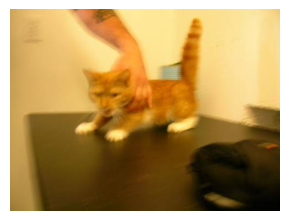

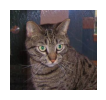

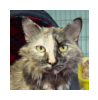

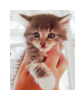

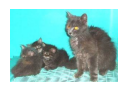

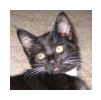

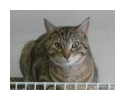

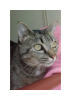

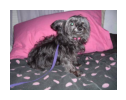

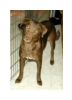

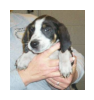

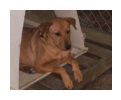

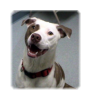

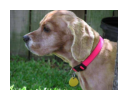

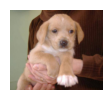

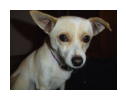

In [32]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname)

for fname in train_cat_fnames[ pic_index-8:pic_index]
]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
for fname in train_dog_fnames[ pic_index-8:pic_index]
]
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()

Khởi tạo 1 CNN:

In [33]:
import tensorflow as tf
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 150x150 with 3 bytes color
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron.
# It will contain a value from 0-1 where 0 for 1 class ('cats')
# and 1 for the other ('dogs')
tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

Trước hết ta thiết lập phương pháp giải bài toán tối ưu. Ở đây ta dùng RMSprop thay cho SGD (do có thể tự động chọn
tham số học)

Tiếp theo chúng ta chuẩn hóa dữ liệu bằng các đưa cường độ pixel về khoảng [0, 1], chỉnh kích thước ảnh về 150x150
và điều hướng các thư mục chứa dữ liệu training

In [35]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics = ['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
batch_size=20,
class_mode='binary',
target_size=(150, 150))

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
batch_size=20,

class_mode = 'binary',
target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Gọi lệnh huấn luyện mô hình

In [36]:
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=15,
validation_data=validation_generator,
validation_steps=50,
verbose=2
)

Epoch 1/15
100/100 - 7s - loss: 0.9151 - accuracy: 0.5430 - val_loss: 0.6736 - val_accuracy: 0.6130 - 7s/epoch - 72ms/step
Epoch 2/15
100/100 - 4s - loss: 0.6562 - accuracy: 0.6405 - val_loss: 0.6460 - val_accuracy: 0.6220 - 4s/epoch - 45ms/step
Epoch 3/15
100/100 - 4s - loss: 0.5688 - accuracy: 0.7140 - val_loss: 0.5922 - val_accuracy: 0.6990 - 4s/epoch - 45ms/step
Epoch 4/15
100/100 - 4s - loss: 0.4792 - accuracy: 0.7695 - val_loss: 0.5991 - val_accuracy: 0.6880 - 4s/epoch - 43ms/step
Epoch 5/15
100/100 - 6s - loss: 0.3835 - accuracy: 0.8250 - val_loss: 0.5782 - val_accuracy: 0.7190 - 6s/epoch - 59ms/step
Epoch 6/15
100/100 - 6s - loss: 0.2903 - accuracy: 0.8790 - val_loss: 0.6829 - val_accuracy: 0.7280 - 6s/epoch - 62ms/step
Epoch 7/15
100/100 - 5s - loss: 0.1988 - accuracy: 0.9135 - val_loss: 0.7779 - val_accuracy: 0.7170 - 5s/epoch - 46ms/step
Epoch 8/15
100/100 - 4s - loss: 0.1162 - accuracy: 0.9550 - val_loss: 0.9833 - val_accuracy: 0.7040 - 4s/epoch - 37ms/step
Epoch 9/15
100/1

Xem xét một số kết quả

1/1 [==============================] - 0s 121ms/step


C:\Users\FPT\AppData\Local\Temp\ipykernel_17824\573956992.py:40: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
C:\Users\FPT\AppData\Local\Temp\ipykernel_17824\573956992.py:43: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


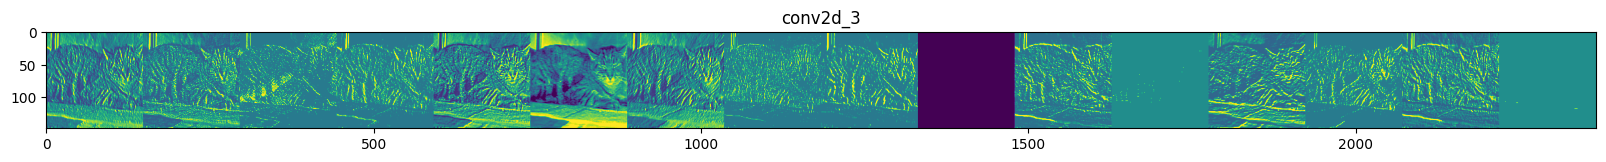

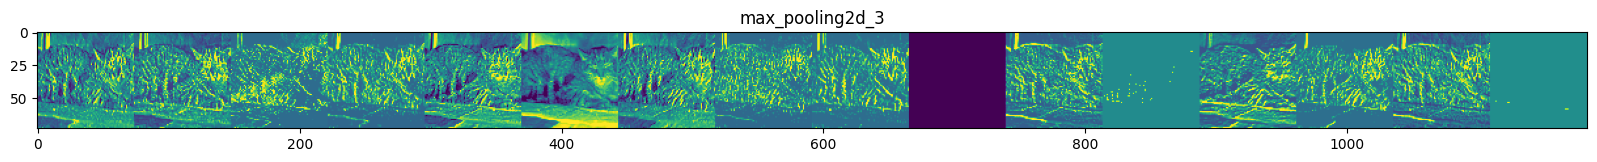

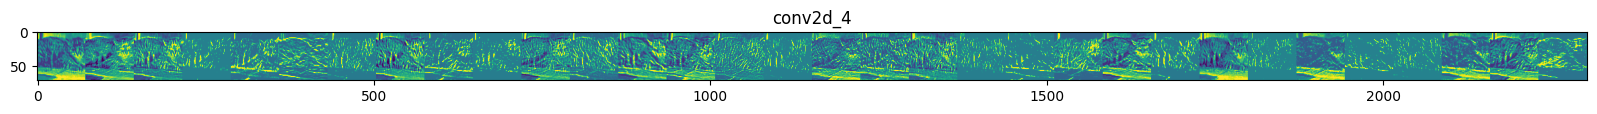

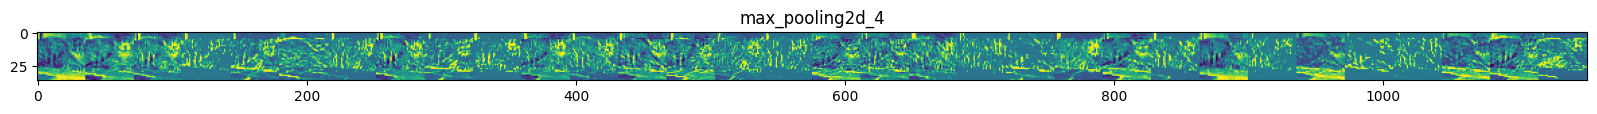

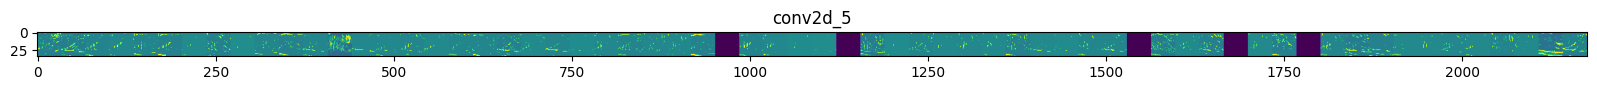

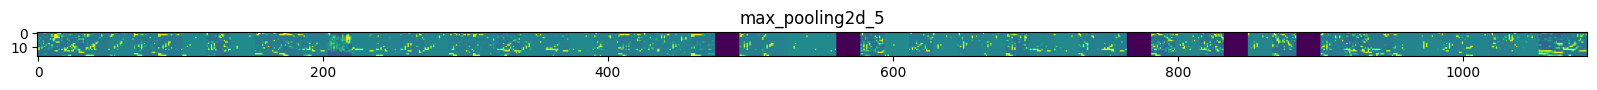

In [37]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs =
successive_outputs)
# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150)) # this is a PIL image
x = img_to_array(img) # Numpy array with shape (150, 150,3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150,150, 3)
# Scale by 1/255
x /= 255.0
# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
# These are the names of the layers, so we can have them as part of our plot

layer_names = [layer.name for layer in model.layers]
# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1] # number of features in the feature map
        size = feature_map.shape[ 1] # feature map shape (1, size, size, n_features)
        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid
        #-----------------
        # Display the grid
        #-----------------
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )

Trong đoạn lệnh trên, chúng ta sẽ in ra kết quả sau mỗi tầng (“ảnh” đầu ra sau mỗi tầng convolution và maxpool) để
hiểu thêm cách hoạt động của CNN để cho ra dãy so sánh được ở tầng flatten.



Đoạn lệnh tiếp theo chúng ta thử sử dụng mô hình với các tham số đã được huấn luyện (train) để dự đoán (predict)
cho một số ảnh đầu vào tùy ý (chú ý cần có chó hoặc mèo). Chúng ta hãy sửa đoạn lệnh này để áp dụng cho một list
các tên file ảnh đầu vào, thay vì từng ảnh như trong hướng dẫn.

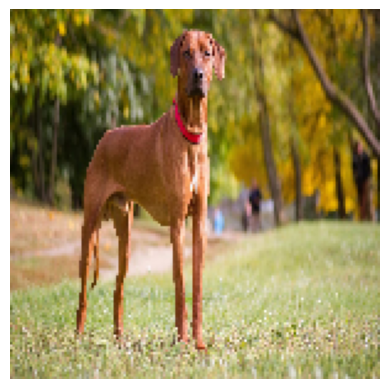

1/1 [==============================] - 0s 120ms/step
1.jpg is a dog


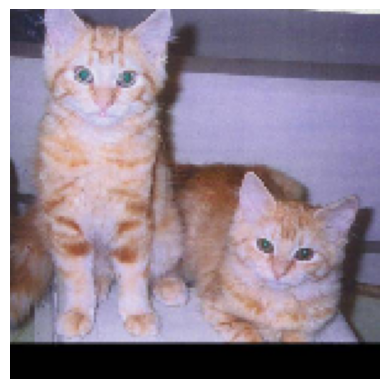

1/1 [==============================] - 0s 24ms/step
2.jpg is a cat


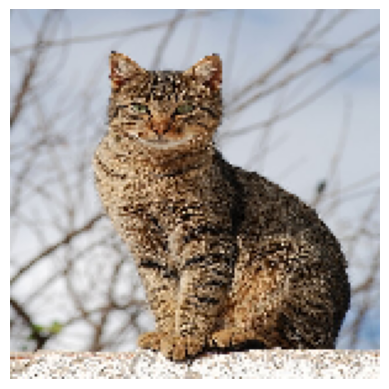

1/1 [==============================] - 0s 29ms/step
3.jpg is a cat


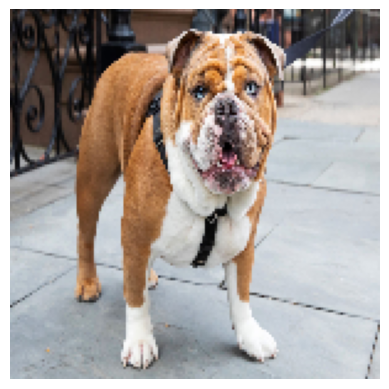

1/1 [==============================] - 0s 34ms/step
4.jpg is a dog


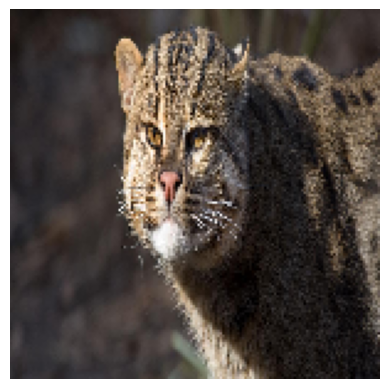

1/1 [==============================] - 0s 40ms/step
5.jpg is a cat


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# List of image file names
# l = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg']

l = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']

# Predicting images
for i in l:
    path = 'D:/' + i  # Path to the image file
    img = load_img(path, target_size=(150, 150))  # Load the image
    plt.imshow(img)  # Display the image
    plt.axis('off')  # Turn off axis
    plt.show()  # Show the image

    x = img_to_array(img)  # Convert image to array
    x /= 255  # Normalize pixel values
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    images = np.vstack([x])  # Stack the image arrays

    classes = model.predict(images, batch_size=10)  # Predict the class
    if classes[0] > 0.5:
        print(i + " is a dog")
    else:
        print(i + " is a cat")


In [39]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

Training Accuracy: 0.9925000071525574
Validation Accuracy: 0.7260000109672546


Text(0.5, 1.0, 'Training and validation loss')

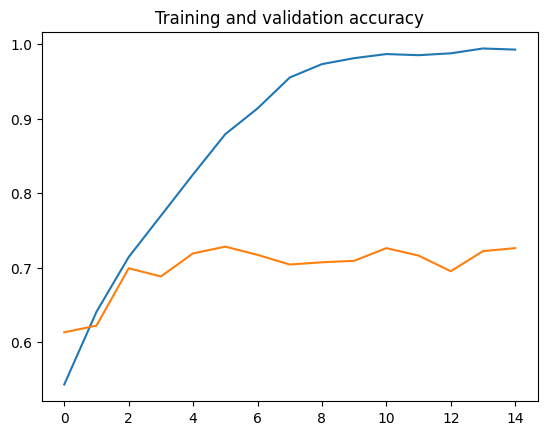

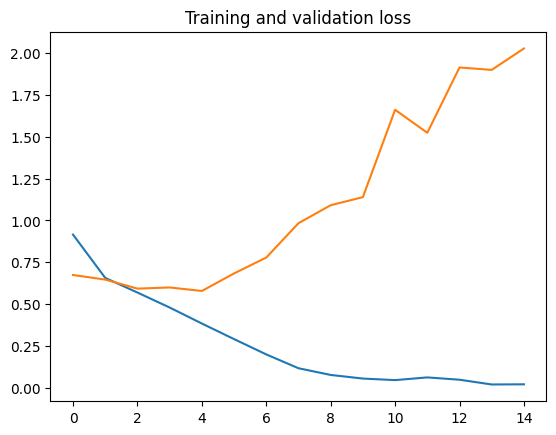

In [40]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history[ 'accuracy' ]
val_acc = history.history[ 'val_accuracy' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot ( epochs, acc )
plt.plot ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot ( epochs, loss )
plt.plot ( epochs, val_loss )
plt.title ('Training and validation loss' )

# Bài tự thực hành 1

### Bổ sung các tầng Dropout này vào giữa các tầng Convolution, rate_drop khoảng từ 0.3 đến 0.5

In [42]:
import random
import tensorflow as tf
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 150x150 with 3 bytes color
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron.
# It will contain a value from 0-1 where 0 for 1 class ('cats')
# and 1 for the other ('dogs')
tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),
tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [43]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics = ['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
batch_size=20,
class_mode='binary',
target_size=(150, 150))

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
batch_size=20,

class_mode = 'binary',
target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=15,
validation_data=validation_generator,
validation_steps=50,
verbose=2
)

Epoch 1/15
100/100 - 6s - loss: 0.7972 - accuracy: 0.5360 - val_loss: 0.6499 - val_accuracy: 0.6060 - 6s/epoch - 62ms/step
Epoch 2/15
100/100 - 6s - loss: 0.6526 - accuracy: 0.5940 - val_loss: 0.6475 - val_accuracy: 0.6170 - 6s/epoch - 58ms/step
Epoch 3/15
100/100 - 6s - loss: 0.6160 - accuracy: 0.6670 - val_loss: 0.6057 - val_accuracy: 0.6380 - 6s/epoch - 56ms/step
Epoch 4/15
100/100 - 5s - loss: 0.5844 - accuracy: 0.6850 - val_loss: 0.6821 - val_accuracy: 0.6120 - 5s/epoch - 51ms/step
Epoch 5/15
100/100 - 5s - loss: 0.5467 - accuracy: 0.7240 - val_loss: 0.5634 - val_accuracy: 0.7250 - 5s/epoch - 46ms/step
Epoch 6/15
100/100 - 5s - loss: 0.5068 - accuracy: 0.7465 - val_loss: 0.6057 - val_accuracy: 0.6640 - 5s/epoch - 47ms/step
Epoch 7/15
100/100 - 5s - loss: 0.4823 - accuracy: 0.7740 - val_loss: 0.6123 - val_accuracy: 0.6700 - 5s/epoch - 47ms/step
Epoch 8/15
100/100 - 4s - loss: 0.4608 - accuracy: 0.7795 - val_loss: 0.6315 - val_accuracy: 0.6630 - 4s/epoch - 37ms/step
Epoch 9/15
100/1

In [45]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

Training Accuracy: 0.8554999828338623
Validation Accuracy: 0.7039999961853027


### Sưu tầm ảnh và predict cho toàn bộ ảnh

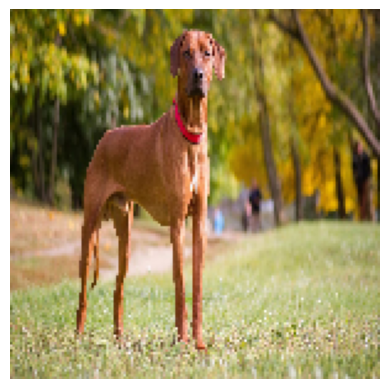

1/1 [==============================] - 1s 1s/step
1.jpg is a dog


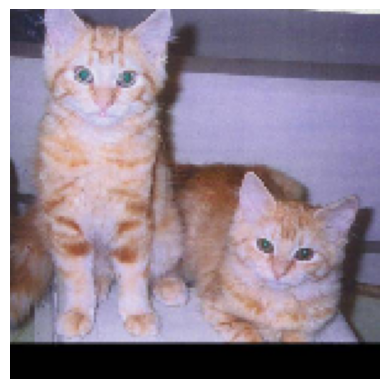

1/1 [==============================] - 0s 171ms/step
2.jpg is a cat


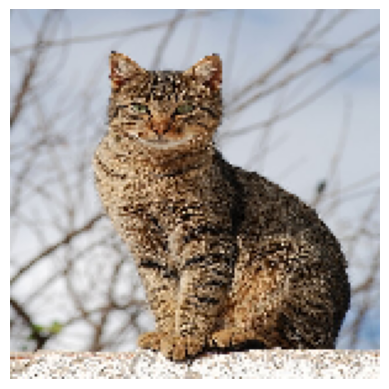

1/1 [==============================] - 0s 269ms/step
3.jpg is a cat


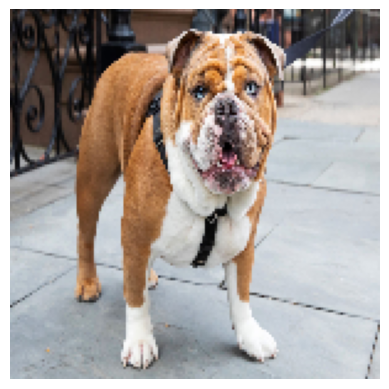

1/1 [==============================] - 0s 235ms/step
4.jpg is a dog


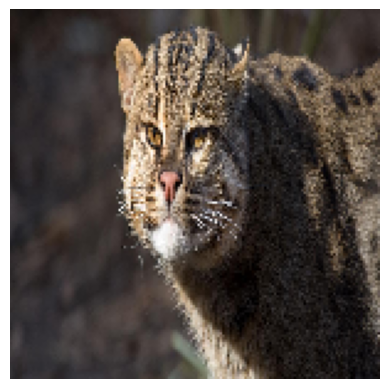

1/1 [==============================] - 0s 184ms/step
5.jpg is a cat


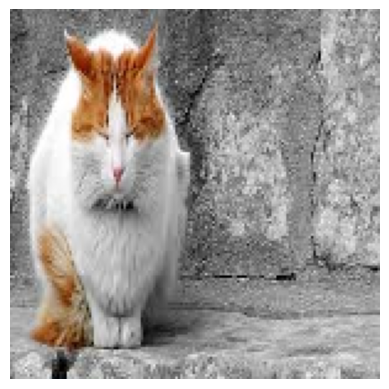

1/1 [==============================] - 0s 207ms/step
6.jpg is a cat


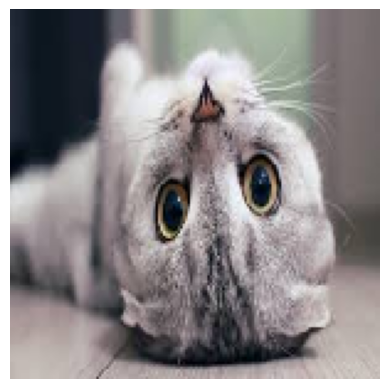

1/1 [==============================] - 0s 323ms/step
7.jpg is a cat


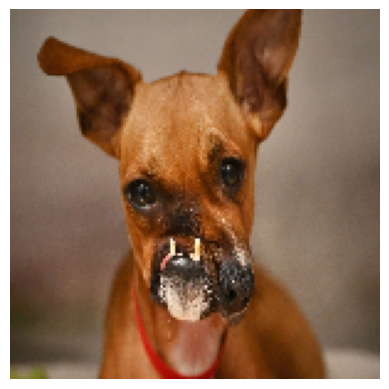

1/1 [==============================] - 0s 358ms/step
8.jpg is a cat


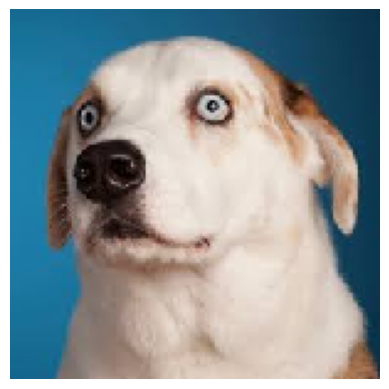

1/1 [==============================] - 0s 152ms/step
9.jpg is a dog


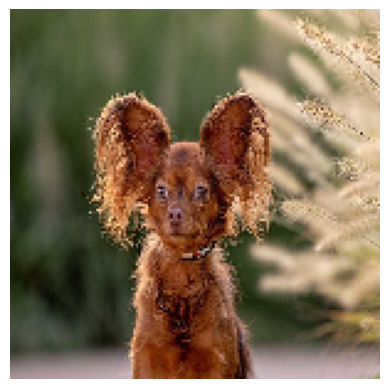

1/1 [==============================] - 0s 286ms/step
10.jpg is a dog


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# List of image file names
l = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg']

# Predicting images
for i in l:
    path = 'D:/' + i  # Path to the image file
    img = load_img(path, target_size=(150, 150))  # Load the image
    plt.imshow(img)  # Display the image
    plt.axis('off')  # Turn off axis
    plt.show()  # Show the image

    x = img_to_array(img)  # Convert image to array
    x /= 255  # Normalize pixel values
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    images = np.vstack([x])  # Stack the image arrays

    classes = model.predict(images, batch_size=10)  # Predict the class
    if classes[0] > 0.5:
        print(i + " is a dog")
    else:
        print(i + " is a cat")

### Hồi quy Logistic để phân loại ảnh

Đưa kích thước các ảnh (resize) về 150x150

Thực hiện chuyển ảnh thành vector, sau đó sử dụng mô hình Hồi quy Logistic để phân loại ảnh. Đánh giá độ
chính xác bằng các độ đo.

In [47]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to resize images
def resize_image(image_path, target_size=(150, 150)):
    image = Image.open(image_path)
    image = image.resize(target_size).convert("RGB")
    return np.array(image)

def load_data(train_dir):
    images = []
    labels = []
    for label in os.listdir(train_dir):
        # Bỏ qua các thư mục không mong muốn
        
        label_dir = os.path.join(train_dir, label)
        for file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, file)
            # Resize image to 150x150
            try:
                resized_image = resize_image(image_path)
                images.append(resized_image)
                # Assign label based on folder name
                if label == 'cats':
                    labels.append(1)  # One-hot encoding for 'cat' (0, 1)
                elif label == 'dogs':
                    labels.append(0)  # One-hot encoding for 'dog' (1, 0)
            except Exception as e:
                print("Error processing image:", image_path)
                print("Error message:", str(e))
    return np.array(images), np.array(labels)


# Load and prepare data
# images, labels = load_data(train_dir)

X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(validation_dir)


# images = np.array(images)
# labels = np.array(labels)

# #Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Flatten the images
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_flatten, y_train)

# Evaluate the model
y_pred = model.predict(X_test_flatten)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.548
Precision: 0.5451127819548872
Recall: 0.58
F1 Score: 0.562015503875969


### Mô hình ANN để phân loại ảnh

Dùng PCA giảm số chiều về còn 225. Sau đó sử dụng mô hình ANN đã có để phân loại 

In [48]:
from sklearn.decomposition import PCA

# Flatten images
X_flatten_train = X_train.reshape(X_train.shape[0], -1)
X_flatten_test = X_test.reshape(X_test.shape[0], -1)

# Initialize PCA with n_components=225
pca = PCA(n_components=225)

# Fit PCA to flattened images
pca.fit(X_flatten_train)
pca.fit(X_flatten_test)

# Transform flattened images to reduced dimension
X_reduced_train = pca.transform(X_flatten_train)
X_reduced_test = pca.transform(X_flatten_test)


In [49]:
print(X_reduced_train.shape)

(2000, 225)


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Chuẩn hóa dữ liệu
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,)))  # Mô hình ANN
])

pipeline.fit(X_reduced_train, y_train)

accuracy = pipeline.score(X_reduced_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.607
